In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sales_df=pd.read_csv('advertising.csv')
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Set X and Y Variables

In [2]:
X=sales_df[['TV','Radio','Newspaper']]
Y=sales_df['Sales']

# Standardize X and Y 

In [3]:
#converting all variables into one scale by subtracting means from each value of the variable and dividing by the corresponding SD of the variable

Y=np.array((Y-Y.mean())/Y.std())
X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

# Implementing the Gradient descent Algorithm

In [4]:
#Method 1-Random Initialization of the Bias and Weights 

import random
#dim- no of weights to be initialized besides the bias

def initialize(dim):
    np.random.seed(seed=42)
    random.seed(42)
    #Initialize the bias
    b=random.random()
    #Initialize the weights
    w=np.random.rand(dim)
    
    return b,w
    
    

In [5]:
b,w=initialize(3)
print('Bias',b,'weights',w)

Bias 0.6394267984578837 weights [0.37454012 0.95071431 0.73199394]


In [6]:
#Method 2-Predict Y values from the Bias and weights

def predict_Y(b,w,X):
    return b+np.matmul(X,w)

In [7]:
b,w=initialize(3)
Y_hat=predict_Y(b,w,X)
Y_hat[0:10]

0    3.231496
1    1.707849
2    2.824761
3    2.753090
4    0.924486
5    3.171365
6    0.622344
7   -0.349354
8   -2.313095
9   -0.768030
dtype: float64

In [8]:
#Method 3-Calculate the Cost Function-MSE

import math

def get_cost(Y,Y_hat):
    Y_resid=Y-Y_hat
    return np.sum(np.matmul(Y_resid.T,Y_resid))/len(Y_resid)

In [9]:
b,w=initialize(3)
Y_hat=predict_Y(b,w,X)
get_cost(Y,Y_hat)


1.9727813290622094

In [10]:
#Method 4-Update the Bias and Weights
def update_beta(x,y,y_hat,b_0,w_0,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    w_1=w_0-learning_rate*dw
    return b_1,w_1


In [11]:
b,w=initialize(3)
print("After Initialization -Bias:",b,"Weights:",w)
Y_hat=predict_Y(b,w,X)
b,w=update_beta(X,Y,Y_hat,b,w,0.01)
print("After first update-Bias:",b,"Weights:",w)

After Initialization -Bias: 0.6394267984578837 Weights: [0.37454012 0.95071431 0.73199394]
After first update-Bias: 0.6266382624887261 Weights: [0.3831587  0.93318613 0.71344909]


# Finding the Optimal Bias and Weights

In [12]:
def run_gradient_descent(X,Y,alpha=0.01,num_iterations=100):
    
    #initialize bias and wights
    
    b,w=initialize(X.shape[1])
    iter_num=0
    
    #gd_iterations_df keeps track of the cost every 10 iterations
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    
    #run the iterations in loop
    
    for each_iter in range(num_iterations):
        #Calculate predicted value of y
        Y_hat=predict_Y(b,w,X)
        #Calculate the cost
        this_cost=get_cost(Y,Y_hat)
        
        #save the previous bias and weights
        prev_b=b
        prev_w=w
        
        #update and calculate the new values of bias and weights
        
        b,w=update_beta(X,Y,Y_hat,prev_b,prev_w,alpha)

        
        #for every 10 iterarions , store the cost i.e. mse
        
        if (iter_num %10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
            
        iter_num+=1
        
    print("Final estimate of b and w:",b,w)
    #return the final bias, weights and the cost at the end
    
    return gd_iterations_df,b,w
        

In [13]:
gd_iterations_df, b, w=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final estimate of b and w: 0.42844895817391465 [0.5227605  0.67911337 0.44240046]


In [14]:
gd_iterations_df[0:10]

,iteration,cost
0,0.0,1.972781
1,10.0,1.885905
2,20.0,1.803150
3,30.0,1.724317
4,40.0,1.649215
5,50.0,1.577663
6,60.0,1.509491
7,70.0,1.444534
8,80.0,1.382639
9,90.0,1.323656


# Plotting the cost function against the iterations 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 0, 'Cost or MSE')

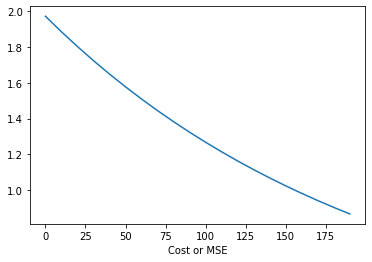

In [16]:
plt.plot(gd_iterations_df['iteration'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.xlabel("Cost or MSE")

In [17]:
print("Final estimates of b and w:",b,w)

Final estimates of b and w: 0.42844895817391465 [0.5227605  0.67911337 0.44240046]


In [18]:
alpha_df_1,b,w=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)

Final estimate of b and w: -5.550284404264813e-16 [0.88465106 0.30065466 0.00138348]


In [19]:
#Reducing learning paramenter to 0.001
alpha_df_2,b,w=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)

Final estimate of b and w: 0.011664695556929715 [0.87172566 0.30203226 0.00909091]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

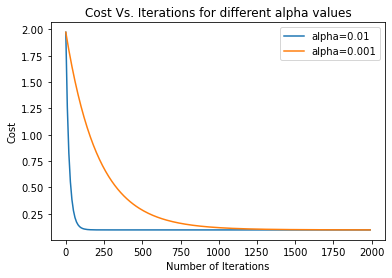

In [20]:
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")

plt.legend()
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.title('Cost Vs. Iterations for different alpha values')

# SCIKIT LEARNING LIBRARY FOR ML

In [21]:
#Splitting dataset into train and test datasets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(sales_df[["TV","Radio","Newspaper"]],sales_df.Sales,test_size=0.3,random_state=42)

In [22]:
len(X_train)

140

In [23]:
len(X_test)

60

In [24]:
#Building Linear Regression Model with Train Dataset

from sklearn.linear_model import LinearRegression

In [25]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [26]:
linreg.intercept_

4.7437667015896885

In [27]:
linreg.coef_

array([0.05358869, 0.10270677, 0.00793167])

In [28]:
list(zip(["TV","Radio","Newspaper"],list(linreg.coef_)))

[('TV', 0.05358869132706913),
 ('Radio', 0.10270676778771291),
 ('Newspaper', 0.007931667677316283)]

In [29]:
#Making prediction on test set

y_pred=linreg.predict(X_test)

In [37]:
test_pred_df=pd.DataFrame({'actual':y_test,
                          'predicted':np.round(y_pred,2),
                          'residuals':y_test-y_pred})

test_pred_df.sample(10)

,actual,predicted,residuals
82,11.3,11.12,0.178278
38,10.1,10.07,0.025888
135,11.6,12.23,-0.626738
114,14.6,14.01,0.585278
126,6.6,9.56,-2.958394
143,10.4,11.21,-0.807422
140,10.9,10.53,0.374490
173,16.7,14.60,2.101154
16,12.5,13.04,-0.540358
128,24.7,21.61,3.092632


In [38]:
#Measuring Accuracy 

from sklearn import metrics

In [39]:
#R squared Error
r2=metrics.r2_score(y_train,linreg.predict(X_train))
print("R squared :",r2)

R squared : 0.8919647339302077


In [40]:
#RMSE Calculation

mse=metrics.mean_squared_error(y_test,y_pred)

In [41]:
rmse=round(np.sqrt(mse),2)
print("RMSE:",rmse)

RMSE: 1.59
